C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_30

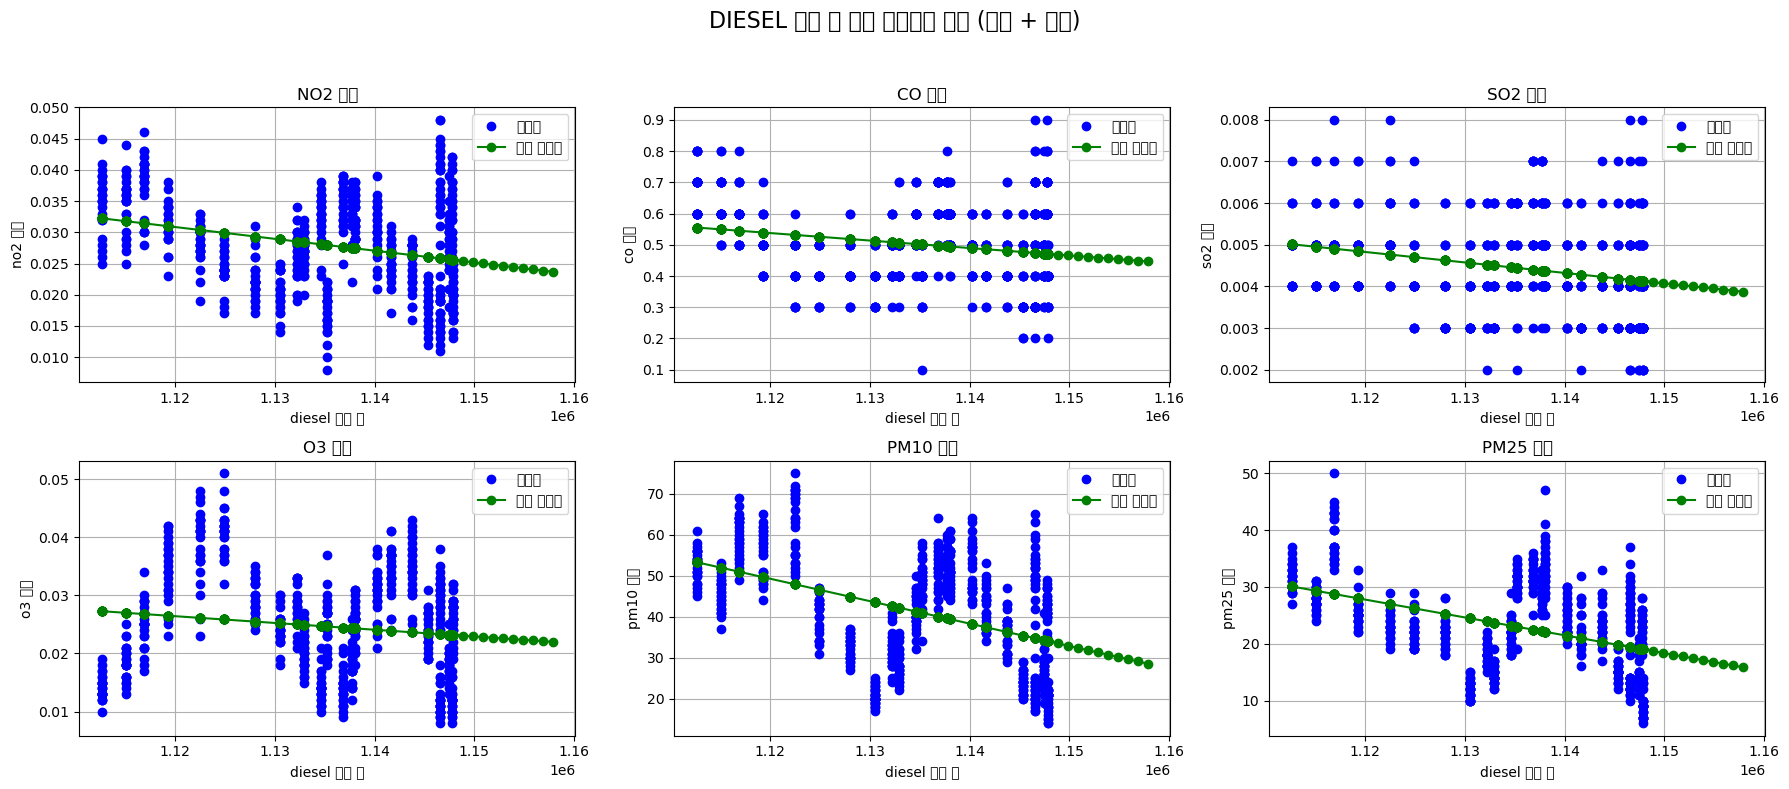

C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_30

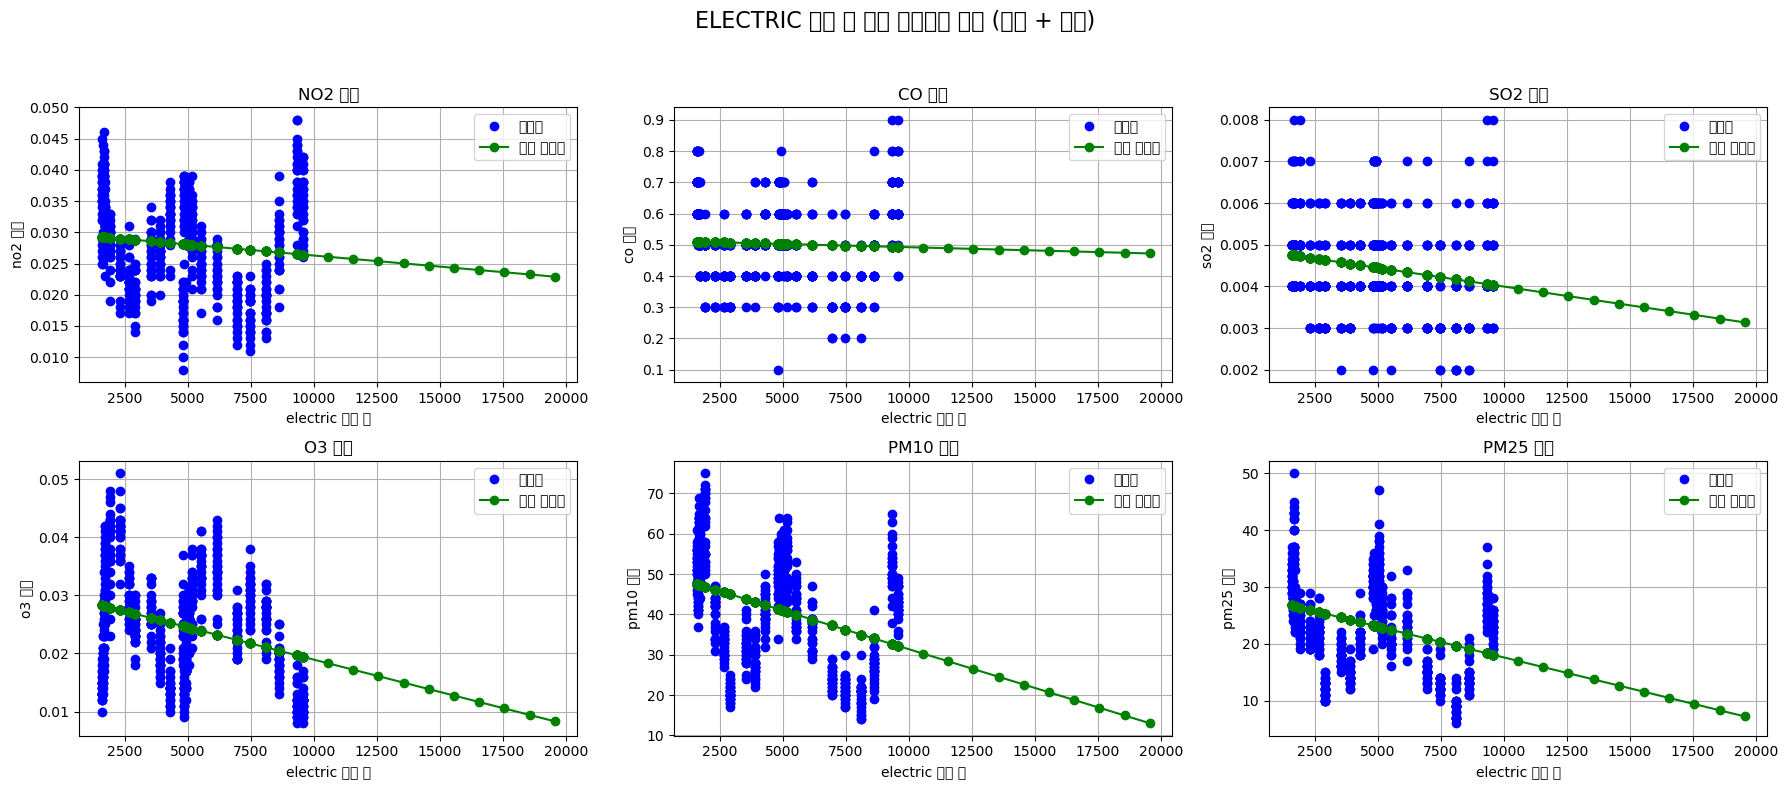

C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_3064\821664069.py:65: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\USER\AppData\Local\Temp\ipykernel_30

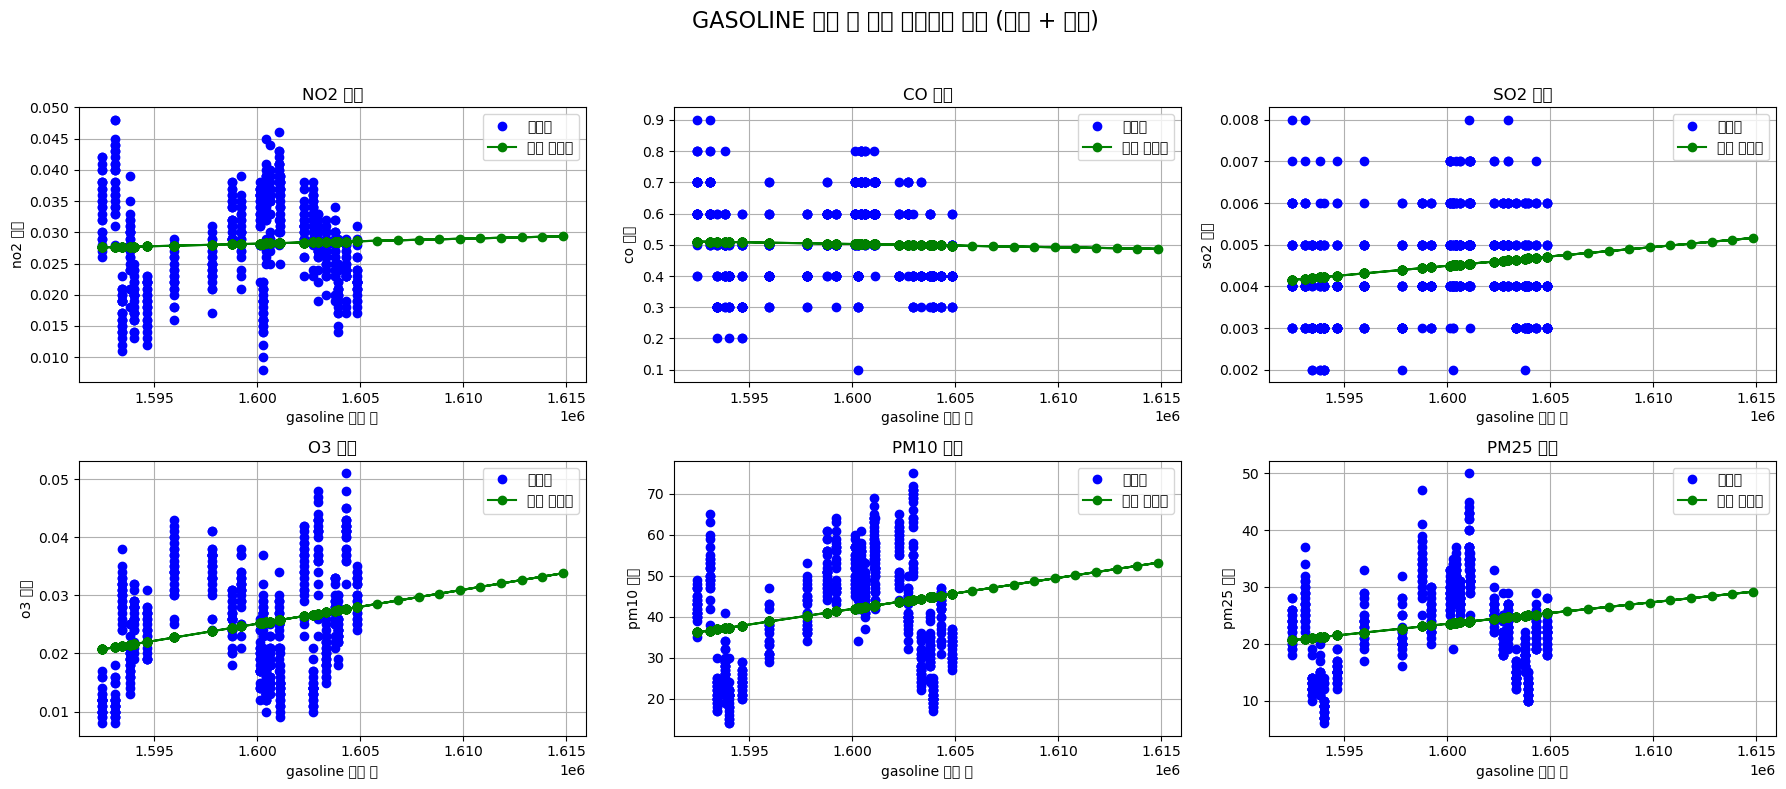

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv(r'C:\Users\USER\Documents\ai-proj2-class4\20.data-preprocessing\전기차용_데이터셋.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 2. 변수 정의
vehicle_types = ['diesel', 'electric', 'gasoline']
pollutants = ['no2', 'co', 'so2', 'o3', 'pm10', 'pm25']

# 3. 결측치 제거
df = df.dropna(subset=vehicle_types + pollutants)

# 4. 시각화 설정
increase_step = 1000
steps = 10

for vehicle_type in vehicle_types:
    latest_val = df[vehicle_type].max()
    future_vals = [latest_val + increase_step * i for i in range(1, steps + 1)]
    future_df = pd.DataFrame({vehicle_type: future_vals})

    fig, axs = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(f"{vehicle_type.upper()} 차량 수 기반 오염물질 예측 (기존 + 미래)", fontsize=16)

    for i, pol in enumerate(pollutants):
        X = df[[vehicle_type]]
        y = df[pol]

        # 모델 학습
        model = LinearRegression()
        model.fit(X, y)

        # 기존 데이터 예측
        y_pred_existing = model.predict(X)

        # 미래 예측
        y_pred_future = model.predict(future_df)

        # x축 연결용: 기존 + 미래 차량 수
        all_x = pd.concat([X, future_df])
        all_y = np.concatenate([y_pred_existing, y_pred_future])

        # subplot 위치 설정
        row, col = divmod(i, 3)
        ax = axs[row][col]

        # 실제 값 (파랑 점선)
        ax.plot(X, y, 'o', label='실제값', color='blue')

        # 예측값 (기존 + 미래, 초록 실선)
        ax.plot(all_x, all_y, '-o', label='선형 예측값', color='green')

        # 수치 설정
        ax.set_title(f'{pol.upper()} 예측')
        ax.set_xlabel(f'{vehicle_type} 차량 수')
        ax.set_ylabel(f'{pol} 농도')
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()